In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
df = pd.read_csv('nutrition-food.csv', encoding='UTF-16')
df.head()
df.tail()
num_rows, num_cols = df.shape
print("Number of columns: ", num_cols)
print("Number of rows: ", num_rows)
for i in df.columns:
    unique = df[i].unique()
    num_unique = df[i].nunique()
    print("For column ",i,", unique enteries  are as follows: ", unique)
    print("For column ",i,", number of unique enteries are: ", num_unique)

Number of columns:  6
Number of rows:  113
For column  Unnamed: 0 , unique enteries  are as follows:  ['Chonga Bagel' '8-Grain Roll' 'Almond Croissant' 'Apple Fritter'
 'Banana Nut Bread' 'Blueberry Muffin with Yogurt and Honey'
 'Blueberry Scone' 'Butter Croissant' 'Butterfly Cookie' 'Cheese Danish'
 'Chewy Chocolate Cookie' 'Chocolate Chip Cookie' 'Chocolate Chunk Muffin'
 'Chocolate Croissant' 'Chocolate Hazelnut Croissant'
 'Chocolate Marble Loaf Cake' 'Cinnamon Morning Bun'
 'Cinnamon Raisin Bagel' 'Classic Coffee Cake' 'Cookie Butter Bar'
 'Cranberry Orange Scone' "Devil's Food Doughnut"
 'Double Chocolate Brownie' 'Double Chocolate Chunk Brownie'
 'Double Chocolate Loaf Cake'
 "Everybody's Favorite - Bantam Bagel (2 Pack)"
 'Everything Bagel with Cheese' 'Frappuccino® Cookie Straw'
 'French Toast - Bantam Bagels (2 Pack)'
 'Gluten-Free Marshmallow Dream Bar' 'Ice Cream Cone Sugar Cookie'
 'Iced Lemon Pound Cake' 'Michigan Cherry Oat Bar' 'Multigrain Bagel'
 'Oatmeal Cookie' 'Oct

In [72]:
df.dtypes

Unnamed: 0       object
 Calories         int64
 Fat (g)        float64
 Carb. (g)        int64
 Fiber (g)        int64
 Protein (g)      int64
dtype: object

In [73]:
null_count = df.isnull().sum()
df_new = df.dropna()
print(df_new)

                             Unnamed: 0   Calories   Fat (g)   Carb. (g)  \
0                          Chonga Bagel        300       5.0          50   
1                          8-Grain Roll        380       6.0          70   
2                      Almond Croissant        410      22.0          45   
3                         Apple Fritter        460      23.0          56   
4                      Banana Nut Bread        420      22.0          52   
..                                  ...        ...       ...         ...   
108  Justin's Chocolate Hazelnut Butter        180      14.0          12   
109      Justin's Classic Almond Butter        190      18.0           6   
110                Lemon Chiffon Yogurt        340      13.0          38   
111            Organic Avocado (Spread)         90       8.0           5   
112                Seasonal Fruit Blend         90       0.0          24   

      Fiber (g)   Protein (g)  
0             3            12  
1             7        

In [74]:
print(df_new.columns)
df_new = df_new.rename(columns={
    ' Calories': 'Calories (kcal)',
    ' Carb. (g)': 'Carbohydrates (g)',
    ' Fat (g)': 'Total Fat (g)'
})
df_new = df_new.drop(columns=['Unnamed: 0', ' Fiber (g)'])
print(df_new.columns)

Index(['Unnamed: 0', ' Calories', ' Fat (g)', ' Carb. (g)', ' Fiber (g)',
       ' Protein (g)'],
      dtype='object')
Index(['Calories (kcal)', 'Total Fat (g)', 'Carbohydrates (g)',
       ' Protein (g)'],
      dtype='object')


In [75]:
numerical_columns = []
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        numerical_columns.append(column)
numerical_df = df[numerical_columns]
min = numerical_df.min()
max = numerical_df.max()
mean = numerical_df.mean()
std = numerical_df.std()
var = numerical_df.var()
sum = numerical_df.sum()
print("Minimum values for each numerical column:")
print(min)
print("Maximum values for each numerical column:")
print(max)
print("Mean values for each numerical column:")
print(mean)
print("Standard deviation for each numerical column:")
print(std)
print("Variance for each numerical column:")
print(var)
print("Sum for each numerical column:")
print(sum)

Minimum values for each numerical column:
Calories       90.0
Fat (g)         0.0
Carb. (g)       5.0
Fiber (g)       0.0
Protein (g)     1.0
dtype: float64
Maximum values for each numerical column:
Calories       650.0
Fat (g)         37.0
Carb. (g)       80.0
Fiber (g)       21.0
Protein (g)     34.0
dtype: float64
Mean values for each numerical column:
Calories       356.637168
Fat (g)         16.353982
Carb. (g)       41.486726
Fiber (g)        2.849558
Protein (g)     11.469027
dtype: float64
Standard deviation for each numerical column:
Calories       127.710685
Fat (g)          8.297397
Carb. (g)       15.796764
Fiber (g)        2.888466
Protein (g)      8.463230
dtype: float64
Variance for each numerical column:
Calories       16310.018963
Fat (g)           68.846792
Carb. (g)        249.537769
Fiber (g)          8.343236
Protein (g)       71.626264
dtype: float64
Sum for each numerical column:
Calories       40300.0
Fat (g)         1848.0
Carb. (g)       4688.0
Fiber (g)      

In [76]:
new_num_rows, num_new_columns = df_new.shape
sample = int(new_num_rows * 0.25)
subset = []
original = df_new.copy()
for i in range(4):
    sampled_subset = original.sample(sample, replace=False)
    subset.append(sampled_subset)
    original = original[~original.index.isin(sampled_subset.index)]
subset_1, subset_2, subset_3, subset_4 = subset
print("Subset 1:")
print(subset_1)
print("\nSubset 2:")
print(subset_2)
print("\nSubset 3:")
print(subset_3)
print("\nSubset 4:")
print(subset_4)
    

Subset 1:
     Calories (kcal)  Total Fat (g)  Carbohydrates (g)   Protein (g)
57               130           12.0                  7             2
68               500           28.0                 46            18
14               390           22.0                 43             7
21               430           23.0                 53             5
31               470           20.0                 68             6
38               330           18.0                 39             4
93               500           30.0                 35            26
12               440           21.0                 60             7
72               450           27.0                 34            20
29               240            5.0                 45             2
45               330           17.0                 44             2
105              560           23.0                 55            34
1                380            6.0                 70            10
17               270    

In the response above, I took refernce from 'numpy.org', 'pandas.pydata.org', some YouTube videos, and some AI tools

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ,
        1.05, 1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 ]),
 <BarContainer object of 20 artists>)

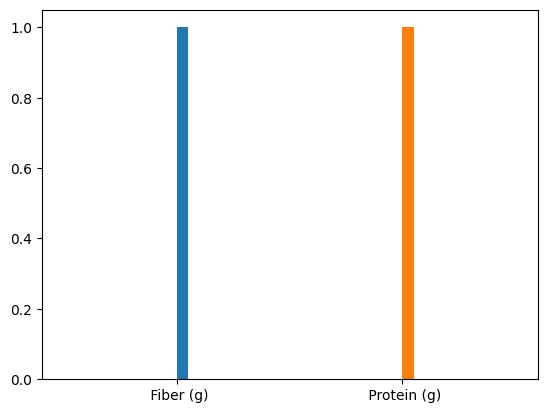

In [77]:
plt.hist(df.columns[4],   bins=20)
plt.hist(df.columns[5], bins=20)

<Axes: >

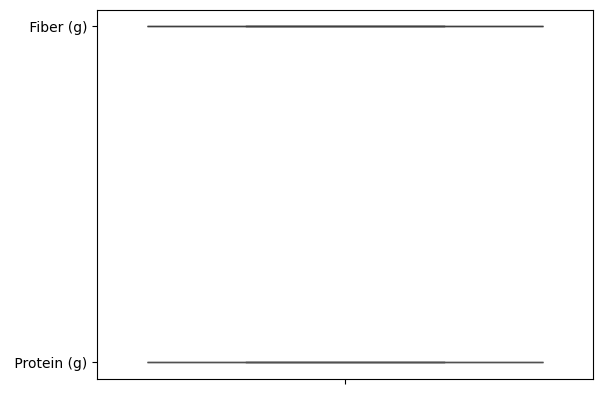

In [78]:
sns.boxplot(df.columns[4])
sns.boxplot(df.columns[5])